In [2]:
from Gaugi import load
from Gaugi.monet.utils import getColor
from Gaugi.monet.PlotFunctions import *
from Gaugi.monet.TAxisFunctions import *
from Gaugi.monet.AtlasStyle import *
from ROOT import TCanvas, TH1F, TH2F, gStyle
from ROOT import kRed, kBlue, kBlack,TLine,kBird, kOrange,kGray, kYellow, kViolet, kGreen, kAzure
from pprint import pprint
import array
import numpy as np
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2
SetAtlasStyle()
GeV=1000.
gStyle.SetPalette(kBird)

Welcome to JupyROOT 6.23/01
Using all sub packages with ROOT dependence

Applying ATLAS style settings...


In [45]:
etbins = [15, 20, 30, 40, 50, 70]
etabins = [0.0, 0.8, 1.37, 1.54, 2.50]

In [74]:
sgn_nof = [
            [21490, 12362, 618, 18154],
            [121811, 65684,2854,81125],
            [277833,167207,6519,172515],
            [286849,186662,4618,202108],
            [105114,68736,1597,71013]
]

bkg_nof = [
            [523981,372257,97614,600198],
            [346143,246076,61155,396224],
            [88659,63230,16062,97835],
            [31857,22087,5607,33642],
            [29068,20689,5334,29627]
]

eta_leg = ['0.0 < |#eta| < 0.8',
           '0.8 < |#eta| < 1.37',
           '1.37 < |#eta| < 1.55',
           '1.55 < |#eta| < 2.50',
          ]

et_leg = ['15#rightarrow20',
          '20#rightarrow30',
          '30#rightarrow40',
          '50#rightarrow#infy',
         ]

In [118]:
def PlotNofGrid( nof_per_bin , _etbins, _etabins, _et_leg, _eta_leg):
    
    print(_etabins)
    canvas = TCanvas('canvas','canvas',700,500)
    from array import array
    hist = TH2F('','', len(_etbins)-1, array('d',_etbins), len(_etabins)-1, array('d',_etabins))
    for etBinIdx in range(len(_etbins)-1):
        for etaBinIdx in range(len(_etabins)-1):        
            hist.SetBinContent(etBinIdx+1,etaBinIdx+1, nof_per_bin[etBinIdx][etaBinIdx])
    
    canvas.SetRightMargin(0.15)
    canvas.SetTopMargin(0.15)
    hist.GetZaxis().SetTitle('Count')
    canvas.SetLogz()
    #hist.GetXaxis().SetLabelSize(0.13);
    #for etBinIdx in range(len(_etbins)-1):
    #    hist.GetXaxis().SetBinLabel(etBinIdx+1,et_leg[etBinIdx-1])
    #hist.GetXaxis().SetNdivisions(6)
    #hist.GetYaxis().SetNdivisions(4)
    #canvas.SetGrid()

    AddHistogram(canvas,hist, 'colz TEXT')
    FormatCanvasAxes(canvas, XLabelSize=16, YLabelSize=16, XTitleOffset=0.87, ZLabelSize=16,
                             ZTitleSize=16, YTitleOffset=1.10, ZTitleOffset=1.1)

    SetAxisLabels(canvas,'E_{T}', '|\eta|')
    return canvas



[0.0, 0.8, 1.37, 1.54, 2.5]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file mc15_zee_nof_per_bin_oldgrid.pdf has been created


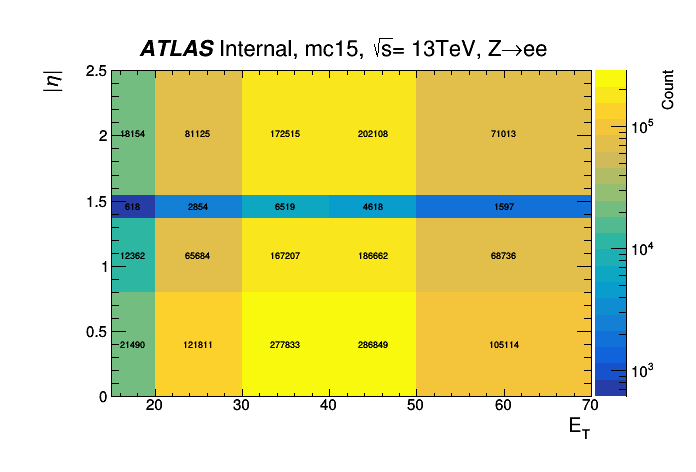

In [120]:
canvas = PlotNofGrid(sgn_nof, etbins, etabins, et_leg, eta_leg)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, Z#rightarrowee')
#AddLegend( canvas,0.2,0.53, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
canvas.Draw()
canvas.SaveAs('mc15_zee_nof_per_bin_oldgrid.pdf')

[0.0, 0.8, 1.37, 1.54, 2.5]


Warning in <TCanvas::Constructor>: Deleting canvas with same name: canvas
Info in <TCanvas::Print>: pdf file mc15_JF17_nof_per_bin_oldgrid.pdf has been created


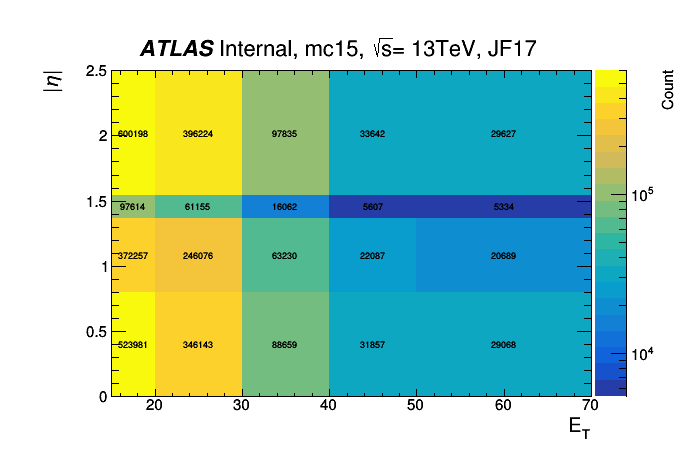

In [121]:
canvas = PlotNofGrid(bkg_nof, etbins, etabins, et_leg, eta_leg)
AddATLASLabel(canvas, 0.2, 0.88, 'Internal, mc15, #sqrt{s}= 13TeV, JF17')
#AddLegend( canvas,0.2,0.53, ['Z#rightarrowee (Signal)', 'JF17 (background)'])
canvas.Draw()
canvas.SaveAs('mc15_JF17_nof_per_bin_oldgrid.pdf')